<a href="https://colab.research.google.com/github/Khushwant-16/22MIS1014_Khushwant_DA2/blob/main/self_org_map_da2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=0e114a022c5c403a797e158280e4849eca021fe089923919c4852b4053b7ebb0
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("Household Power Consumption Analysis") \
    .getOrCreate()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession

# Step 1: Create a Spark session
spark = SparkSession.builder \
    .appName("Household Power Consumption Analysis") \
    .getOrCreate()

# Step 2: Adjust the file path based on your Google Drive structure
file_path = '/content/drive/MyDrive/household_power_consumption.txt'  # Adjust the file path as needed

# Step 3: Load the dataset into a Spark DataFrame with the correct delimiter
df = spark.read.csv(file_path, header=True, inferSchema=True, sep=';')

# Step 4: Show the first few rows of the dataset
df.show(5)



+----------+-------------------+-------------------+---------------------+-------+----------------+--------------+--------------+--------------+
|      Date|               Time|Global_active_power|Global_reactive_power|Voltage|Global_intensity|Sub_metering_1|Sub_metering_2|Sub_metering_3|
+----------+-------------------+-------------------+---------------------+-------+----------------+--------------+--------------+--------------+
|16/12/2006|2024-09-28 17:24:00|              4.216|                0.418|234.840|          18.400|         0.000|         1.000|          17.0|
|16/12/2006|2024-09-28 17:25:00|              5.360|                0.436|233.630|          23.000|         0.000|         1.000|          16.0|
|16/12/2006|2024-09-28 17:26:00|              5.374|                0.498|233.290|          23.000|         0.000|         2.000|          17.0|
|16/12/2006|2024-09-28 17:27:00|              5.388|                0.502|233.740|          23.000|         0.000|         1.000| 

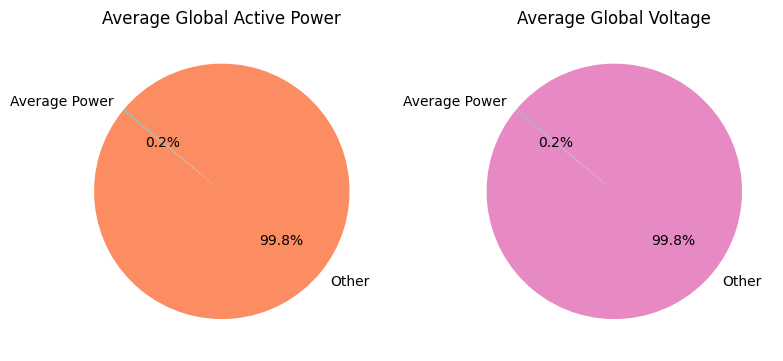

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pandas_df is your DataFrame

# Convert relevant columns to numeric
pandas_df['Global_active_power'] = pd.to_numeric(pandas_df['Global_active_power'], errors='coerce')
pandas_df['Voltage'] = pd.to_numeric(pandas_df['Voltage'], errors='coerce')

# Drop rows with NaN values in the relevant columns
pandas_df.dropna(subset=['Global_active_power', 'Voltage'], inplace=True)

# Calculate average values
avg_power = pandas_df['Global_active_power'].mean()
avg_voltage = pandas_df['Voltage'].mean()

# Prepare data for pie chart
labels = ['Average Power', 'Other']
power_sizes = [avg_power, pandas_df['Global_active_power'].sum() - avg_power]  # Remaining power for illustration
voltage_sizes = [avg_voltage, pandas_df['Voltage'].sum() - avg_voltage]  # Remaining voltage for illustration

# Pie Chart for Average Global Active Power
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.pie(power_sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Average Global Active Power')

# Pie Chart for Average Global Voltage
plt.subplot(1, 2, 2)
plt.pie(voltage_sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#8da0cb', '#e78ac3'])
plt.title('Average Global Voltage')

plt.tight_layout()
plt.show()


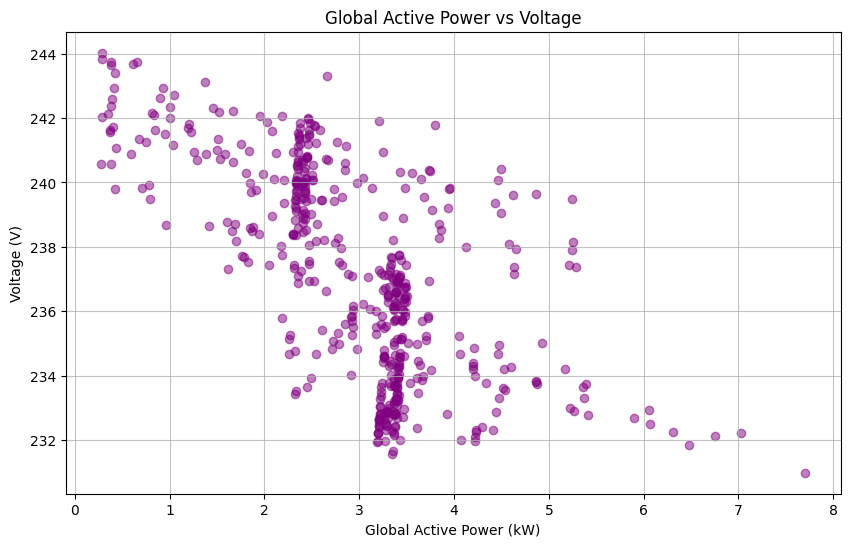

In [ ]:
# Scatter Plot for Global Active Power vs Voltage
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['Global_active_power'], pandas_df['Voltage'], alpha=0.5, color='purple')
plt.title('Global Active Power vs Voltage')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Voltage (V)')
plt.grid(alpha=0.75)
plt.show()


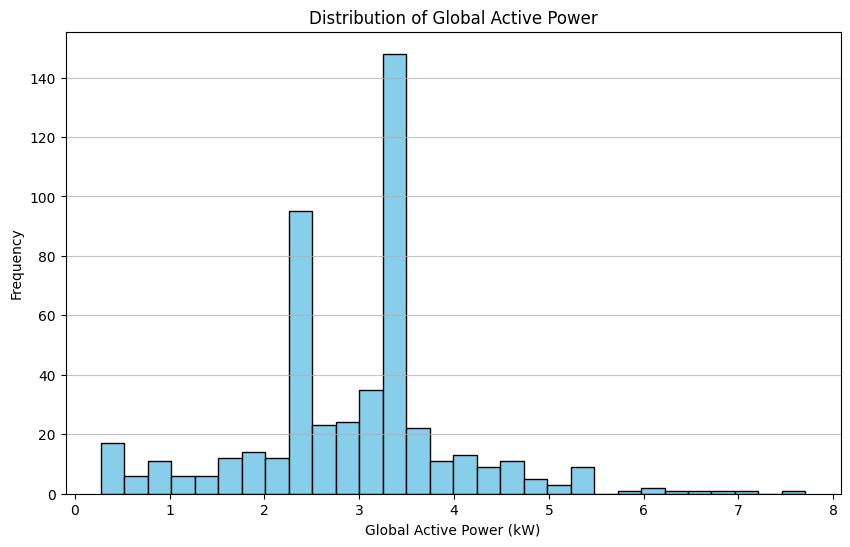

In [ ]:
# Histogram for Global Active Power
plt.figure(figsize=(10, 6))
plt.hist(pandas_df['Global_active_power'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


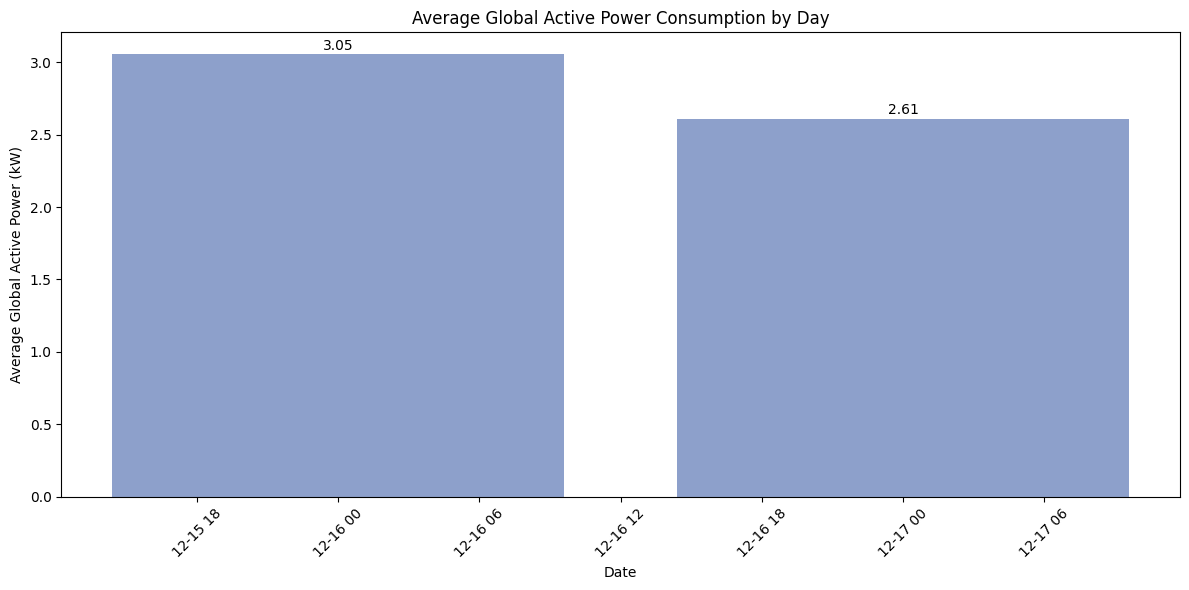

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame creation (replace this with your actual DataFrame)
# pandas_df = pd.read_csv('your_data.csv') # Uncomment this line to load your data

# Assuming your DataFrame has a datetime column 'Date' and a 'Global_active_power' column
# Convert 'Date' to datetime format if it’s not already
pandas_df['Date'] = pd.to_datetime(pandas_df['Date'], format='%Y-%m-%d')

# Grouping by day and calculating average Global Active Power
daily_avg_power = pandas_df.groupby(pandas_df['Date'].dt.date)['Global_active_power'].mean().reset_index()

# Create a DataFrame for plotting
daily_avg_power.columns = ['Date', 'Average Global Active Power']

# Bar Plot: Average Global Active Power by Day
plt.figure(figsize=(12, 6))
bars = plt.bar(daily_avg_power['Date'], daily_avg_power['Average Global Active Power'], color='#8da0cb')
plt.title('Average Global Active Power Consumption by Day')
plt.ylabel('Average Global Active Power (kW)')
plt.xlabel('Date')

# Adding value annotations on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
